# HW6

In [1]:
%pylab inline
from sklearn.cluster import KMeans
from sklearn import svm

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [72]:
training = loadtxt('data/training.txt.1')
validation = loadtxt('data/validation.txt')
test = loadtxt('data/test.txt')

In [73]:
shape(test)
arange(1, 23)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [74]:
def substract_max_data(data):
    for i in range((20)):
        x_vals = array(list((set(data[:,i]))))
        values = arange(1, len(x_vals)+1)
        for j in range(len(data)-1):
            index = where(data[j,i]==x_vals)[0]
            #print(values[index], j)
            data[j,i] = values[index]
    return data

In [75]:
training = substract_max_data(training)
validation = substract_max_data(validation)
test = substract_max_data(test)

In [76]:
X_tr = training[:,:-1]
Y_tr = training[:,-1]

X_val = validation[:,:-1]
Y_val = validation[:,-1]

X_test = test
#Y_tr = training[:,-1]

# K-means clustering

In [8]:
kmeans= KMeans(2, init='k-means++').fit(training[:,:-1])

In [11]:
dif = (kmeans.labels_+1) - training[:,-1]
index = where(dif==0)

In [103]:
from math import factorial

XX = np.zeros((len(XX), 5))
XX[:,2] = np.ones(5)
len(X_val)

100

# SVM

In [143]:
def core_method(X_train, Y_train, data_test):
    predictions = np.zeros((len(data_test), 20))
    for i in range(20):
        X_del = delete(X_train, i, 1)
        X_val_del = delete(data_test, i, 1)
        clf = svm.NuSVC()
        clf.fit(X_del, Y_train)
        predictions[:,i] = clf.predict(X_val_del)
    return predictions

In [144]:
predictions = core_method(X_tr, Y_tr, X_val)
dif = predictions
for i in range(20):
    dif[:,i] = np.abs(predictions[:,i] - Y_val)
    print(sum(dif[:,i]), i)


31.0 0
31.0 1
31.0 2
30.0 3
29.0 4
30.0 5
31.0 6
30.0 7
30.0 8
30.0 9
31.0 10
30.0 11
29.0 12
31.0 13
31.0 14
31.0 15
30.0 16
30.0 17
30.0 18
30.0 19


array([ 2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,
        1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,
        2.,  2.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,
        1.,  1.,  2.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,
        2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.])

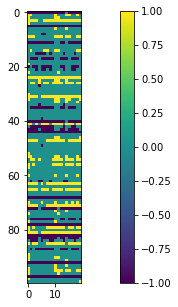

In [138]:
figsize(14,5)
imshow(dif)
colorbar()

In [50]:
clf = svm.SVC()

clf.fit(X_tr, Y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
x = np.zeros((len(X_val),3))
x[:,0]  =clf.predict(X_val)
#type(predictions)

In [53]:
sum(predictions - Y_val)

-30.0

In [54]:
len(predictions)

100